# Analysis

Stage 4: generate plots and summary statistics

In [1]:
import pandas as pd

## Recent trends

Look at last five years

In [2]:
brl_always = pd.read_excel('results/all_brl.xlsx')

In [3]:
def merge_author_list_func(this_row):
    alist = []
    if type(this_row.uob_author_list)==str:
        alist = eval(this_row.uob_author_list)
    if type(this_row.uwe_author_list)==str:
        alist = alist + eval(this_row.uwe_author_list)
    if type(this_row.scholar_author_list)==str:
        alist = alist + eval(this_row.scholar_author_list)
    return alist

brl_always['all_author_list'] = brl_always.apply(merge_author_list_func, axis=1)
brl_always


,Unnamed: 0,Unnamed: 1,title_uob,uob_detail_url,uob_date_str,date_uob,uob_author_list,uob_source_url_list,year,title_lower,...,uwe_detail_link,date_uwe,uwe_author_list,uwe_source_url_list,title,scholar_year_str,scholar_author_list,scholar_source_url_list,scholar_detail_url_list,all_author_list
0,0,1281,NaN,NaN,NaN,NaT,NaN,NaN,2023.0,3d machine vision and deep learning for enabli...,...,https://uwe-repository.worktribe.com/output/10...,2023-01-01,"['Melvyn Smith', 'Lyndon Smith']",['https://uwe-repository.worktribe.com/person/...,NaN,NaN,NaN,NaN,NaN,"[Melvyn Smith, Lyndon Smith]"
1,0,1380,NaN,NaN,NaN,NaT,NaN,NaN,2023.0,a comprehensive review of scab disease detecti...,...,https://uwe-repository.worktribe.com/output/10...,2023-01-01,['Charlie Yang'],['https://uwe-repository.worktribe.com/person/...,NaN,NaN,NaN,NaN,NaN,[Charlie Yang]
2,0,0,A configuration-optimisation method for passiv...,https://research-information.bris.ac.uk/en/pub...,15 Nov 2023,2023-11-15,['Dr Andrew T Conn'],['https://research-information.bris.ac.uk/en/p...,2023.0,a configuration-optimisation method for passiv...,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Dr Andrew T Conn]
3,0,1373,NaN,NaN,NaN,NaT,NaN,NaN,2023.0,a constrained framework based on iblf for robo...,...,https://uwe-repository.worktribe.com/output/10...,2023-01-01,['Charlie Yang'],['https://uwe-repository.worktribe.com/person/...,NaN,NaN,NaN,NaN,NaN,[Charlie Yang]
4,0,1594,NaN,NaN,NaN,NaT,NaN,NaN,2023.0,a fabric-based soft hand exoskeleton for assis...,...,NaN,NaT,NaN,NaN,A fabric-based soft hand exoskeleton for assis...,2023.0,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,"[Carlos A. Cifuentes, Marcela Munera]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,0,1645,NaN,NaN,NaN,NaT,NaN,NaN,NaN,fatigue test on optical fiber angle sensors ba...,...,NaN,NaT,NaN,NaN,Fatigue Test on Optical Fiber Angle Sensors Ba...,NaN,['Carlos A. Cifuentes'],['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,[Carlos A. Cifuentes]
1674,0,1647,NaN,NaN,NaN,NaT,NaN,NaN,NaN,integration of a social robot in physical reha...,...,NaN,NaT,NaN,NaN,Integration of a Social Robot in Physical Reha...,NaN,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,"[Carlos A. Cifuentes, Marcela Munera]"
1675,0,1648,NaN,NaN,NaN,NaT,NaN,NaN,NaN,preliminary biomechanical evaluation of differ...,...,NaN,NaT,NaN,NaN,Preliminary Biomechanical Evaluation of Differ...,NaN,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,"[Carlos A. Cifuentes, Marcela Munera]"
1676,0,1649,NaN,NaN,NaN,NaT,NaN,NaN,NaN,robot for coaching during gait training with l...,...,NaN,NaT,NaN,NaN,Robot for Coaching during Gait Training with L...,NaN,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,"[Carlos A. Cifuentes, Marcela Munera]"


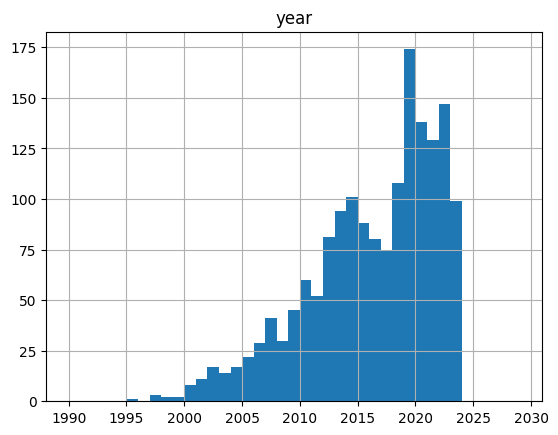

In [4]:
hist = brl_always.hist(column=['year'],bins=range(1990,2030))

## Focus on 2021 to 2023

In [5]:
years = [2019, 2020, 2021, 2022, 2023]
num_papers = [sum(brl_always['year']==y) for y in years]
num_papers

[174, 138, 129, 147, 99]

In [47]:
brl_yellow = (253/255, 183/255, 20/255)
brl_blue = (35/255, 86/255, 167/255)

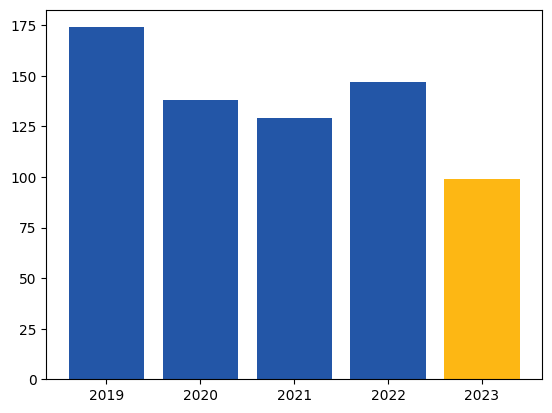

In [48]:
import matplotlib.pyplot as plt
colors = [brl_blue for y in years]
colors[-1] = brl_yellow
plt.bar(years,num_papers,color=colors)
plt.savefig('results/papers.png',dpi=300)

In [7]:
brl_since_2018 = brl_always[brl_always['year']>2018]
len(brl_since_2018)

687

In [8]:
sum(num_papers)

687

In [9]:
authors = set([])
for a in brl_since_2018['uwe_author_list']:
    if type(a)==str:
        #print(eval(a))
        authors = authors.union(set(eval(a)))
for a in brl_since_2018['uob_author_list']:
    if type(a)==str:
        #print(eval(a))
        authors = authors.union(set(eval(a)))
for a in brl_since_2018['scholar_author_list']:
    if type(a)==str:
        #print(eval(a))
        authors = authors.union(set(eval(a)))
authors

{'Carlos A. Cifuentes',
 'Charlie Yang',
 'Chris Harper',
 'Chris Melhuish',
 'Dr Andrew T Conn',
 'Dr Antonia Tzemanaki',
 'Dr Dandan Zhang',
 'Dr Edmund R Hunt',
 'Dr Efi Psomopoulou',
 'Dr Helmut Hauser',
 'Dr Hemma Philamore',
 'Dr Hermes Gadelha',
 'Dr Matthew Studley',
 "Dr Paul J O'Dowd",
 'Dr Shane P Windsor',
 'Lyndon Smith',
 'Manuel Giuliani',
 'Marcela Munera',
 'Mark Hansen',
 'Martin Pearson',
 'Melvyn Smith',
 'Mr Ben Ward-Cherrier',
 'Mr Martin S Garrad',
 'Paul Bremner',
 'Professor Arthur G Richards',
 'Professor Jonathan M Rossiter',
 'Professor Nathan F Lepora',
 'Professor Sabine Hauert',
 'Professor Tom S Richardson',
 'Professor Walterio W Mayol-Cuevas',
 'Tony Pipe'}

In [10]:
total_num_authors = len(authors)
total_num_authors

31

## Collaboration Graph

In [18]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(authors)

In [19]:
for a in brl_since_2018['all_author_list']:
    if len(a)>1:
        #print(a)
        for i in range(len(a)):
            for j in range(i):
                #print(i,j)
                #print(a[i],a[j])
                G.add_edge(a[i],a[j])

In [20]:
import re
def fix_label(lab):
    new_lab = lab.replace('Professor','')
    new_lab = new_lab.replace('Dr','')
    new_lab = new_lab.replace('Mr','')
    new_lab = re.sub(' [A-Z] ', ' ', new_lab)
    new_lab = re.sub(' [A-Z]\. ', ' ', new_lab)
    new_lab = new_lab.replace(' ','\n')
    return(new_lab.strip())
print(fix_label('Professor Arthur G Richards'))

Arthur
Richards


C:\Users\aeagr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


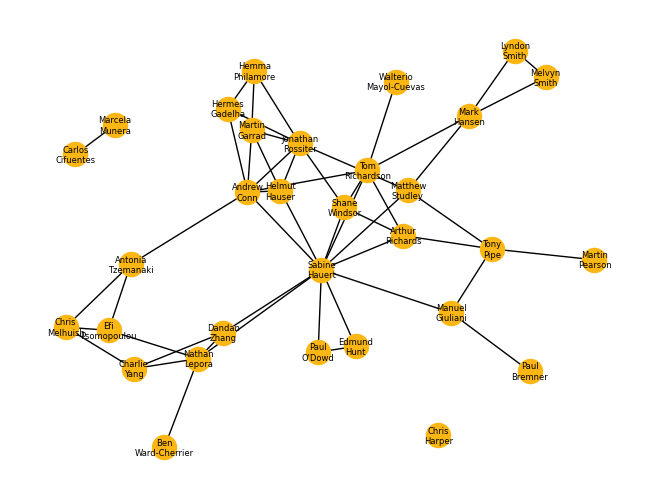

In [44]:
#pos = nx.random_layout(G)
pos = nx.circular_layout(G)
#pos = nx.planar_layout(G)
#pos = nx.bipartite_layout(G)
pos = nx.kamada_kawai_layout(G, weight=None)
pos = nx.spring_layout(G,k=1,pos = pos, weight=None)
nx.draw(G, pos, node_color=brl_yellow)

label_dict = {n: fix_label(n) for n in G}
labels = nx.draw_networkx_labels(G, pos, font_size=6, labels=label_dict, font_color='k')
plt.savefig('results/collab.png', dpi=300)

In [22]:
G.nodes

NodeView(('Paul Bremner', 'Lyndon Smith', 'Manuel Giuliani', 'Martin Pearson', 'Dr Hermes Gadelha', 'Marcela Munera', 'Professor Walterio W Mayol-Cuevas', 'Professor Nathan F Lepora', 'Professor Arthur G Richards', 'Mark Hansen', 'Dr Andrew T Conn', 'Dr Helmut Hauser', 'Mr Martin S Garrad', 'Chris Melhuish', 'Professor Jonathan M Rossiter', 'Professor Sabine Hauert', 'Dr Efi Psomopoulou', "Dr Paul J O'Dowd", 'Carlos A. Cifuentes', 'Dr Antonia Tzemanaki', 'Dr Edmund R Hunt', 'Dr Matthew Studley', 'Melvyn Smith', 'Dr Hemma Philamore', 'Charlie Yang', 'Dr Dandan Zhang', 'Mr Ben Ward-Cherrier', 'Chris Harper', 'Dr Shane P Windsor', 'Tony Pipe', 'Professor Tom S Richardson'))

In [23]:
G.edges

EdgeView([('Paul Bremner', 'Manuel Giuliani'), ('Lyndon Smith', 'Melvyn Smith'), ('Lyndon Smith', 'Mark Hansen'), ('Manuel Giuliani', 'Tony Pipe'), ('Manuel Giuliani', 'Professor Sabine Hauert'), ('Martin Pearson', 'Tony Pipe'), ('Dr Hermes Gadelha', 'Dr Hemma Philamore'), ('Dr Hermes Gadelha', 'Professor Jonathan M Rossiter'), ('Dr Hermes Gadelha', 'Dr Andrew T Conn'), ('Marcela Munera', 'Carlos A. Cifuentes'), ('Professor Walterio W Mayol-Cuevas', 'Professor Tom S Richardson'), ('Professor Nathan F Lepora', 'Dr Efi Psomopoulou'), ('Professor Nathan F Lepora', 'Dr Dandan Zhang'), ('Professor Nathan F Lepora', 'Professor Sabine Hauert'), ('Professor Nathan F Lepora', 'Charlie Yang'), ('Professor Nathan F Lepora', 'Mr Ben Ward-Cherrier'), ('Professor Arthur G Richards', 'Professor Sabine Hauert'), ('Professor Arthur G Richards', 'Professor Tom S Richardson'), ('Professor Arthur G Richards', 'Tony Pipe'), ('Professor Arthur G Richards', 'Dr Shane P Windsor'), ('Mark Hansen', 'Dr Matthew 